<a class="anchor" id="home"></a>


<h1 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3" id=title>KNN Binary Classification of Heart Failure Mortality</h1>
<p hidden>Palette: Creamsicle: #FFAE88, 
               White: #FFFFFF,
               Nautical: #467296,
               Grey: #FFAE88
</p>

### Table of Contents
* [Section 1: Importing Necessary Libraries and Data](#section1)
    * [Video: What is K-Nearest Neighbor?](#intro)
* [Section 2: Previewing Data](#section2)
* [Section 3: Data Cleaning](#section3)
* [Section 4: Building the Model](#section4)
* [Section 5: Testing Custom Data](#section5)

<a class="anchor" id="section1"></a>

<h2 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3">Importing Necessary Libraries and Data</h2>

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import sklearn
from IPython.display import YouTubeVideo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [228]:
path = "/Users/lgm/DS_Projects/Diamonds/FIC.Full CSV.csv"

<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>What is K-Nearest Neighbor?</h3>

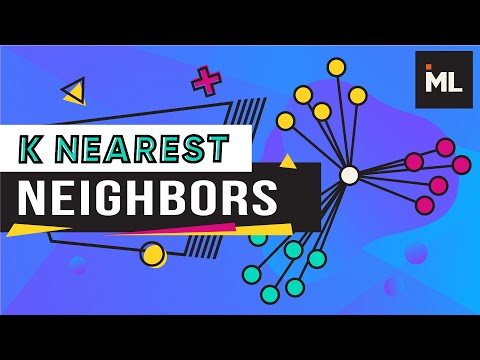

In [232]:
video = YouTubeVideo("0p0o5cmgLdE")
display(video)

<a class="anchor" id="section2"></a>

<h2 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3" id=title>Previewing Data</h2>

In [3]:
df = pd.read_csv(path)
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [4]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

<a class="anchor" id="section3"></a>


<h2 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3" id=title>Data Cleaning</h2>

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>Fixing Column Names</h3>
<ul style="color:#467296; text-align:left; border: 1px solid #C4C4C3">
    <li>Removing spaces</li><li>Converting periods to underscores</li><li>Converting binary values</li>
    <li>Converting Age Groups to Integers</li>
</ul>

In [5]:
df.rename(columns={'Locality  ': 'Locality', 'Marital status                       ': 'Marital_status', 'Others ': "Others", 'Life.Style                                                                              ': 'Life_style'}, 
          inplace=True)

In [6]:
columns_list = list(df.columns)
new_columns_list = []
for column in columns_list:
    new_columns_list.append(column.replace('.', '_'))
df.columns = new_columns_list

In [7]:
binary_columns = {}
for column in df:
    if len((df[column].unique())) == 2:
        curr_list = list(df[column].unique())
        curr_list.sort()
        if curr_list != [0, 1]:
            binary_columns[column] = curr_list
binary_columns

{'Gender': ['Female', 'Male'],
 'Locality': ['RURAL', 'URBAN'],
 'Marital_status': ['MARRIED', 'SINGLE'],
 'Life_style': ['NO', 'YES'],
 'Sleep': ['NO', 'YES'],
 'Category': ['FREE', 'PAID'],
 'Depression': ['NO', 'YES'],
 'Hyperlipi': ['NO', 'YES'],
 'Smoking': ['NO', 'YES'],
 'Family_History': ['NO', 'YES'],
 'HTN': ['NO', 'YES'],
 'Allergies': ['NO', 'YES'],
 'Hypersensitivity': ['NO', 'YES']}

In [8]:
for column, values in binary_columns.items():
    if column != 'Marital_status':
        df[column] = df[column].replace([values[0], values[1]],[0, 1])
    else:
        df[column] = df[column].replace([values[0], values[1]],[1, 0])
df.head()

,Age,Age_Group,Gender,Locality,Marital_status,Life_style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK_React,Reaction,Mortality,Follow_Up
0,45,41-50,0,0,1,0,0,0,1,1,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,0,1,1,0,0,0,1,1,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,0,0,1,1,1,0,1,1,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,0,0,1,1,1,0,1,1,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,0,0,1,1,0,0,1,1,...,4.0,3,2,7,3,1,NO,0,0,34


In [9]:
df.Age_Group.unique()

array(['41-50', '51-60', '61-70', '21-30', '31-40'], dtype=object)

In [10]:
df["Age_Group"] = df["Age_Group"].replace(['41-50', '51-60', '61-70', '21-30', '31-40'],[3, 4, 5, 1, 2])
df.Age_Group.unique()

array([3, 4, 5, 1, 2])

In [11]:
df["SK_React"].unique()

array(['NO', 'COUGH.BLEEDING', 'SKIN.BLEEDING', 'LUNGS', 'BODY.PAIN',
       'NAUSEA.TEMP', 'STOMACH.BLEEDING'], dtype=object)

In [12]:
df["SK_React"] = df["SK_React"].replace(['NO', 'COUGH.BLEEDING', 'SKIN.BLEEDING', 'LUNGS', 'BODY.PAIN',
       'NAUSEA.TEMP', 'STOMACH.BLEEDING'],[0, 1, 2, 3, 4, 5, 6])
df.SK_React.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
for column in df:
    print(column, ":", df[column].unique())

Age : [45 51 55 56 57 58 59 60 61 62 63 65 66 24 25 35 38 40 44 46 47 50 52 53
 54 64 67 68 69 70 77]
Age_Group : [3 4 5 1 2]
Gender : [0 1]
Locality : [0 1]
Marital_status : [1 0]
Life_style : [0 1]
Sleep : [0 1]
Category : [0 1]
Depression : [1 0]
Hyperlipi : [1 0]
Smoking : [0 1]
Family_History : [0 1]
F_History : [0 1]
Diabetes : [1 0]
HTN : [0 1]
Allergies : [0 1]
BP : [100.6   90.6  100.7  160.1  140.7  120.8  130.8  160.9  140.9  110.7
 190.11 160.7  150.9   80.5  120.9  130.9  120.7 ]
Thrombolysis : [0 1]
BGR : [ 84 135 146  85 166  96 129 117 164 213 320 152 115 280 210  60 251 363
 260 125 208 127 323 110 291 426  89 131 348 563 392  86 102 137 153 463
 231 512]
B_Urea : [ 28.   17.   37.   78.  104.   42.   55.   30.   25.   36.   31.   35.
  40.  394.   33.    2.3  39.   41.   54.   46.   24.   26.   43.   47.
 162.   61.   38.   27. ]
S_Cr : [ 0.9   0.7   1.    1.2   4.    1.1  22.9   0.8   0.6   1.08  2.7   1.6
  1.3 ]
S_Sodium : [138 144 137 139 130 146 136 142 135 140 1

In [14]:
value_list = []
for i in range(len(list(df["Others"].unique()))):
    value_list.append(i)
df["Others"] = df["Others"].replace(list(df["Others"].unique()),value_list)
df["Others"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [15]:
value_list = []
for i in range(len(list(df["CO"].unique()))):
    value_list.append(i)
df["CO"] = df["CO"].replace(list(df["CO"].unique()),value_list)
df["CO"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [16]:
value_list = []
for i in range(len(list(df["Diagnosis"].unique()))):
    value_list.append(i)
df["Diagnosis"] = df["Diagnosis"].replace(list(df["Diagnosis"].unique()),value_list)
df["Diagnosis"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>Removing Null Values</h3>

In [17]:
clean_df = df.dropna()
df.shape, clean_df.shape

((368, 60), (368, 60))

<span style="color:#467296; text-align:left; border: 1px solid #C4C4C3">
    No null values found in the data</span>

<a class="anchor" id="section4"></a>


<h2 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3" id=title>Building the Model</h2>

In [21]:
y = df["Mortality"].values
X = df[['Age',
 'Age_Group',
 'Gender',
 'Locality',
 'Marital_status',
 'Life_style',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family_History',
 'F_History',
 'Diabetes',
 'HTN',
 'Allergies',
 'BP',
 'Thrombolysis',
 'BGR',
 'B_Urea',
 'S_Cr',
 'S_Sodium',
 'S_Potassium',
 'S_Chloride',
 'C_P_K',
 'CK_MB',
 'ESR',
 'WBC',
 'RBC',
 'Hemoglobin',
 'P_C_V',
 'M_C_V',
 'M_C_H',
 'M_C_H_C',
 'PLATELET_COUNT',
 'NEUTROPHIL',
 'LYMPHO',
 'MONOCYTE',
 'EOSINO',
 'Others',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num',
 'SK',
 'SK_React',
 'Reaction',
 'Follow_Up']].values

In [22]:
train_n_value_accuracies = {}
test_n_value_accuracies = {}
train_test_percent_accuracies = {}
test_test_percent_accuracies = {}
neighbors = np.arange(1, 31)
percents = np.arange(1, 51)
percents = percents / 100
for i in range(1, 31):
    for percent in range(1, 51):
        percent = percent / 100
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percent, random_state=26, stratify=y)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_n_value_accuracies[i] = train_score
        test_n_value_accuracies[i] = test_score
        train_test_percent_accuracies[percent] = train_score
        test_test_percent_accuracies[percent] = test_score

Text(0, 0.5, 'Percent Accuracy')

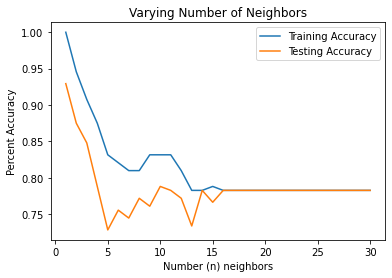

In [23]:
plt.title("Varying Number of Neighbors")
plt.plot(neighbors, train_n_value_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_n_value_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number (n) neighbors")
plt.ylabel("Percent Accuracy")

<span style="color:#467296; text-align:left; border: 1px solid #C4C4C3">
    It appears that n = 10 neighbors may be optimal for the model, but numbers less than 5 should be tested as well.</span>

Text(0, 0.5, 'Percent Accuracy')

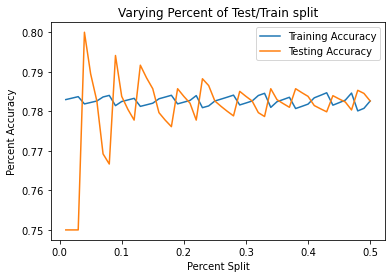

In [24]:
plt.title("Varying Percent of Test/Train split")
plt.plot(percents, train_test_percent_accuracies.values(), label = "Training Accuracy")
plt.plot(percents, test_test_percent_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Percent Split")
plt.ylabel("Percent Accuracy")

<span style="color:#467296; text-align:left; border: 1px solid #C4C4C3">A percent split about equal to .22 appears optimal.</span>

<a class="anchor" id="section5"></a>


<h2 style="color:#FFAE88; background-color:#467296; text-align:center; border: 3px solid #C4C4C3" id=title>Testing Custom Data</h2>

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>Using optimal Neighbors and Training Percentage</h3>

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.22, random_state=26, stratify=y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accuracy

0.9259259259259259

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>Establishing Column Data Ranges for Randomization of Test Data</h3>

In [75]:
column_data_range = {}

for column in df:
    if column == 'Mortality':
        continue
    else:
        minima = df[column].min()
        maxima = df[column].max()
        column_data_range[column] = [minima, maxima]

<h3 style="color:white; background-color:#FFAE88; text-align:center;" id=cleaning1>Creating Random Test Data</h3>
<ul style="color:#467296; text-align:left; border: 1px solid #C4C4C3">
    <li>Setting a fixed Age value for more probable deaths</li><li>Creating random values between each columns data ranges with step = 1</li>
</ul>

In [225]:
X_new_test1 = []
for i in range(10):
    curr_row = []
    for column, value in column_data_range.items():
        if column == 'Age':
            curr_row.append(80)
        elif value[0] == 0 and value[1] == 1:
            curr_row.append(random.randint(0, 1))
        else:
            curr_row.append(float(np.random.choice(np.arange(value[0], value[1], 1))))
    X_new_test1.append(curr_row)

In [226]:
y_new_predictions = knn.predict(X_new_test1)
y_new_predictions

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

<h1 style="color:white; background-color:#FFAE88; text-align:center; padding-top: 5px; padding-bottom: 5px; border: 2px solid #C4C4C3"><a href="#home">Home</a></h1>